# APOLLO HOSPITAL - Business Case Study

Apollo Hospitals was established in 1983, renowned as the architect of modern healthcare in India. As the nation's first corporate hospital, Apollo Hospitals is acclaimed for pioneering the private healthcare revolution in the country.


Apollo Hospitals Enterprise Limited is an Indian multinational healthcare group headquartered in Chennai. Along with the eponymous hospital chain, the company also operates pharmacies, primary care and diagnostic centres, telehealth clinics, and digital healthcare services among others through its subsidiaries.






## Problem Statement


As a data scientist working at Apollo 24/7, the ultimate goal is to tease out meaningful and actionable insights from Patient-level collected data.

The company wants to know:

• Which variables are significant in predicting the reason for hospitalization for different regions

• How well some variables like viral load, smoking, Severity Level describe the hospitalization charges

### Following are the analysis made in this notebook

- Hospitaliztion for smoker and non smoker , Males and females , region wise

- Viral load for smoker and non smoker , Males and females , region wise
- Rainy day vs clear day users count

- Severity level for smoker and non smoker , Males and females , region wise

- Univariate , bivariate analysia of dependent and non dependent variables

- Hypothesis testing - Chi-square , anova ,2 -sample t test, levene , shapiro 

- Confidence interval of hospitalization charges for smoker and non smoker

- Outlier treatment

- Missing value treatment

- Recommendations & Observations

In [194]:
#impoorting Libraties

import numpy as np
import numpy.random as rd
import pandas as pd
import matplotlib.pyplot as plt
import plotly as pt
import plotly.express as px
import seaborn as sbn
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

%matplotlib inline
%config InlineBackend.figure_format ='retina'

#statastics 
from scipy.stats import norm
from scipy import stats
from scipy.stats import chi2_contingency
from scipy.stats import ttest_ind # T-test for independent samples
from scipy.stats import shapiro # Shapiro-Wilk’s test for Normality
from scipy.stats import levene # Levene's test for Equality of Variance
from scipy.stats import f_oneway # One-way ANOVA
from scipy.stats import chi2_contingency # Chi-square test of independence

from matplotlib.ticker import FormatStrFormatter
import plotly.express as px
import plotly.graph_objs as go
from plotly import tools
from plotly.offline import iplot

from sklearn.preprocessing import OneHotEncoder

from sklearn import preprocessing


from scipy.stats import ttest_ind, f_oneway, kruskal # numeric Vs catogerical
from scipy.stats import chi2_contingency # categorical Vs categorical

# from scipy.stats import pearsonr, spearmanr # numeric Vs numeric

from scipy.stats import kstest # cdf

from scipy.stats import levene
from scipy.stats import norm
from scipy.stats import shapiro
from sklearn.preprocessing import StandardScaler
from statsmodels.graphics.gofplots import qqplot_2samples, qqplot

from statsmodels.distributions.empirical_distribution import ECDF

In [133]:
df= pd.read_csv("")

In [134]:
# Printing first 5 rows in dataframe
df.head(5)

,Unnamed: 0,age,sex,smoker,region,viral load,severity level,hospitalization charges
0,0,19,female,yes,southwest,9.30,0,42212
1,1,18,male,no,southeast,11.26,1,4314
2,2,28,male,no,southeast,11.00,3,11124
3,3,33,male,no,northwest,7.57,0,54961
4,4,32,male,no,northwest,9.63,0,9667


In [135]:
# Shape of dataframe
df.shape

(1338, 8)

In [136]:
# Columns in yulu dataset
df.dtypes

Unnamed: 0                   int64
age                          int64
sex                         object
smoker                      object
region                      object
viral load                 float64
severity level               int64
hospitalization charges      int64
dtype: object

In [137]:
# Finding any null values present in dataset
df.isnull().sum()

Unnamed: 0                 0
age                        0
sex                        0
smoker                     0
region                     0
viral load                 0
severity level             0
hospitalization charges    0
dtype: int64

We can see that there are no null values present in the data

In [138]:
df.describe()

,Unnamed: 0,age,viral load,severity level,hospitalization charges
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,668.500000,39.207025,10.221233,1.094918,33176.058296
std,386.391641,14.049960,2.032796,1.205493,30275.029296
min,0.000000,18.000000,5.320000,0.000000,2805.000000
25%,334.250000,27.000000,8.762500,0.000000,11851.000000
50%,668.500000,39.000000,10.130000,1.000000,23455.000000
75%,1002.750000,51.000000,11.567500,2.000000,41599.500000
max,1337.000000,64.000000,17.710000,5.000000,159426.000000


In [139]:
df.describe(include=["object"])

,sex,smoker,region
count,1338,1338,1338
unique,2,2,4
top,male,no,southeast
freq,676,1064,364


In [140]:
#Category columns
category_columns=df.dtypes=="O"
cat_cols= category_columns[category_columns].index
cat_cols

Index(['sex', 'smoker', 'region'], dtype='object')

## Values count present - columnwise

In [141]:
columns = ['sex','smoker','region','severity level']
for col in columns:
  print("Value Counts in", col)
  print("")
  print(df[col].value_counts())
  print("-------"*20)

Value Counts in sex

male      676
female    662
Name: sex, dtype: int64
--------------------------------------------------------------------------------------------------------------------------------------------
Value Counts in smoker

no     1064
yes     274
Name: smoker, dtype: int64
--------------------------------------------------------------------------------------------------------------------------------------------
Value Counts in region

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64
--------------------------------------------------------------------------------------------------------------------------------------------
Value Counts in severity level

0    574
1    324
2    240
3    157
4     25
5     18
Name: severity level, dtype: int64
--------------------------------------------------------------------------------------------------------------------------------------------


## One hot / Label Encoding

In [142]:
# Converting type of columns to category
df['sex']=df['sex'].astype('category')
  
#Assigning numerical values and storing it in another columns
df['sex_new']=df['sex'].cat.codes
  
  
#Create an instance of One-hot-encoder
enc=OneHotEncoder()
  
#Passing encoded columns
enc_data=pd.DataFrame(enc.fit_transform(df[['sex_new']]).toarray())
  
#Merge with main
df_new=df.join(enc_data)

# Droping Route type 
df=df.drop(['sex'], axis=1)



# Converting type of columns to category
df['smoker']=df['smoker'].astype('category')
  
#Assigning numerical values and storing it in another columns
df['smoker_new']=df['smoker'].cat.codes
  
  
#Create an instance of One-hot-encoder
enc=OneHotEncoder()
  
#Passing encoded columns
enc_data=pd.DataFrame(enc.fit_transform(df[['smoker_new']]).toarray())
  
#Merge with main
df_new=df.join(enc_data)

# Droping Route type 
df=df.drop(['smoker'], axis=1)

#Renaming columns
df.rename(columns = {'smoker_new':'smoker', 'sex_new':'sex'}, inplace = True)

## Correlating in Heatmap

In [143]:
df_copy = df.copy().corr()
fig = px.imshow(df_copy, text_auto=True, width=1000, height=600)
fig.show()


In the heatmap, we can see that the severity and viral load are correlated , and the hospitalization charges is more darker for smoker

## Univariate analysis

<Figure size 1440x504 with 0 Axes>

Text(0.5, 1.0, 'hospitalization charges')

Text(0.5, 1.0, 'Severity level')

Text(0.5, 1.0, 'Viral load')

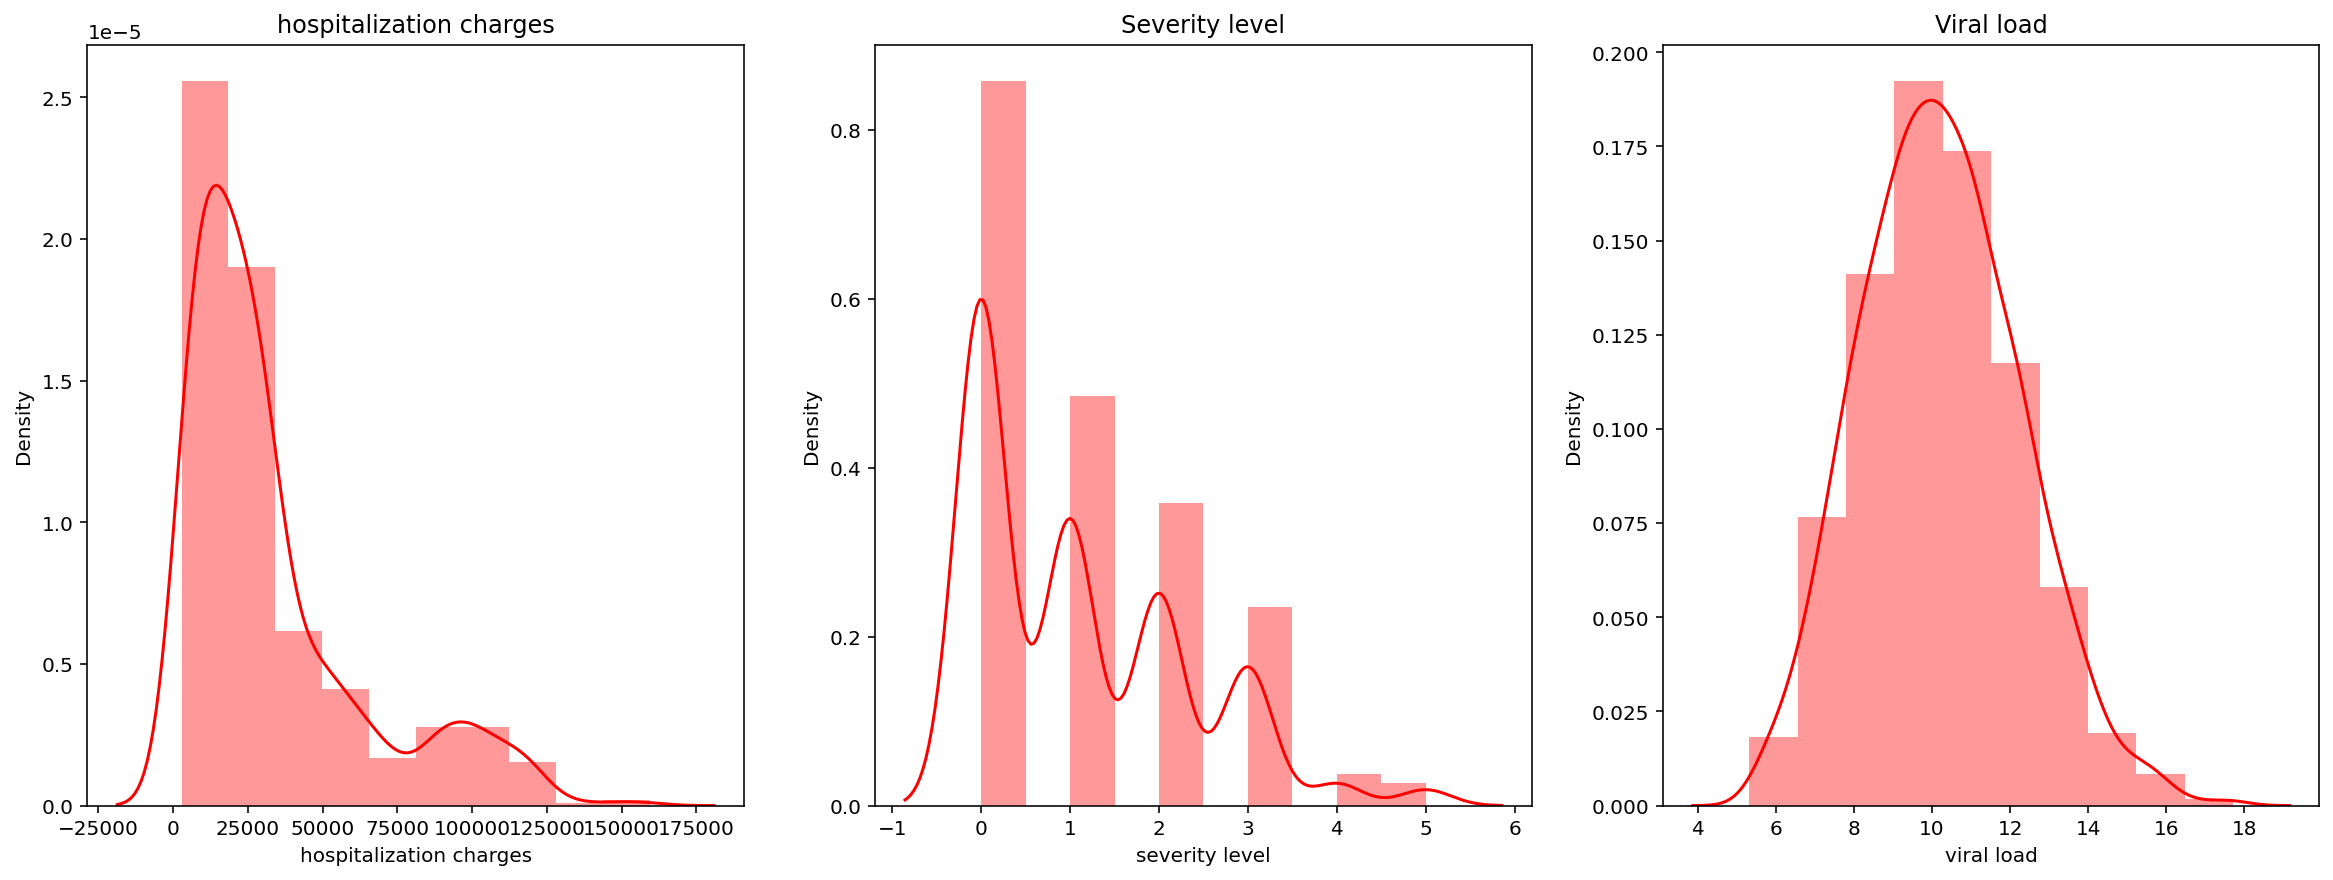

In [144]:
# Checking distribution of 'hospitalization', 'vira load','severity level' column -
plt.figure(figsize=(20, 7))
    
#Histogram
plt.subplot(1, 3, 1)
sns.distplot(df['hospitalization charges'],bins=10, color ='red' ,kde=True)
plt.title('hospitalization charges')

#Boxplot
plt.subplot(1, 3, 2)
sns.distplot(df['severity level'],bins=10, color ='red' ,kde=True)
plt.title('Severity level')

#Histogram
plt.subplot(1, 3, 3)
sns.distplot(df['viral load'],bins=10, color ='red' ,kde=True)
plt.title('Viral load')
plt.show()



As we can clearly see that , hospitalization and viral load follows normal distributin , and the severity level does not follows any of distribution

## Boxplots

<Figure size 1440x720 with 0 Axes>

Text(0.5, 1.0, 'Boxplot')

Text(0.5, 1.0, 'Boxplot')

Text(0.5, 1.0, 'Boxplot')

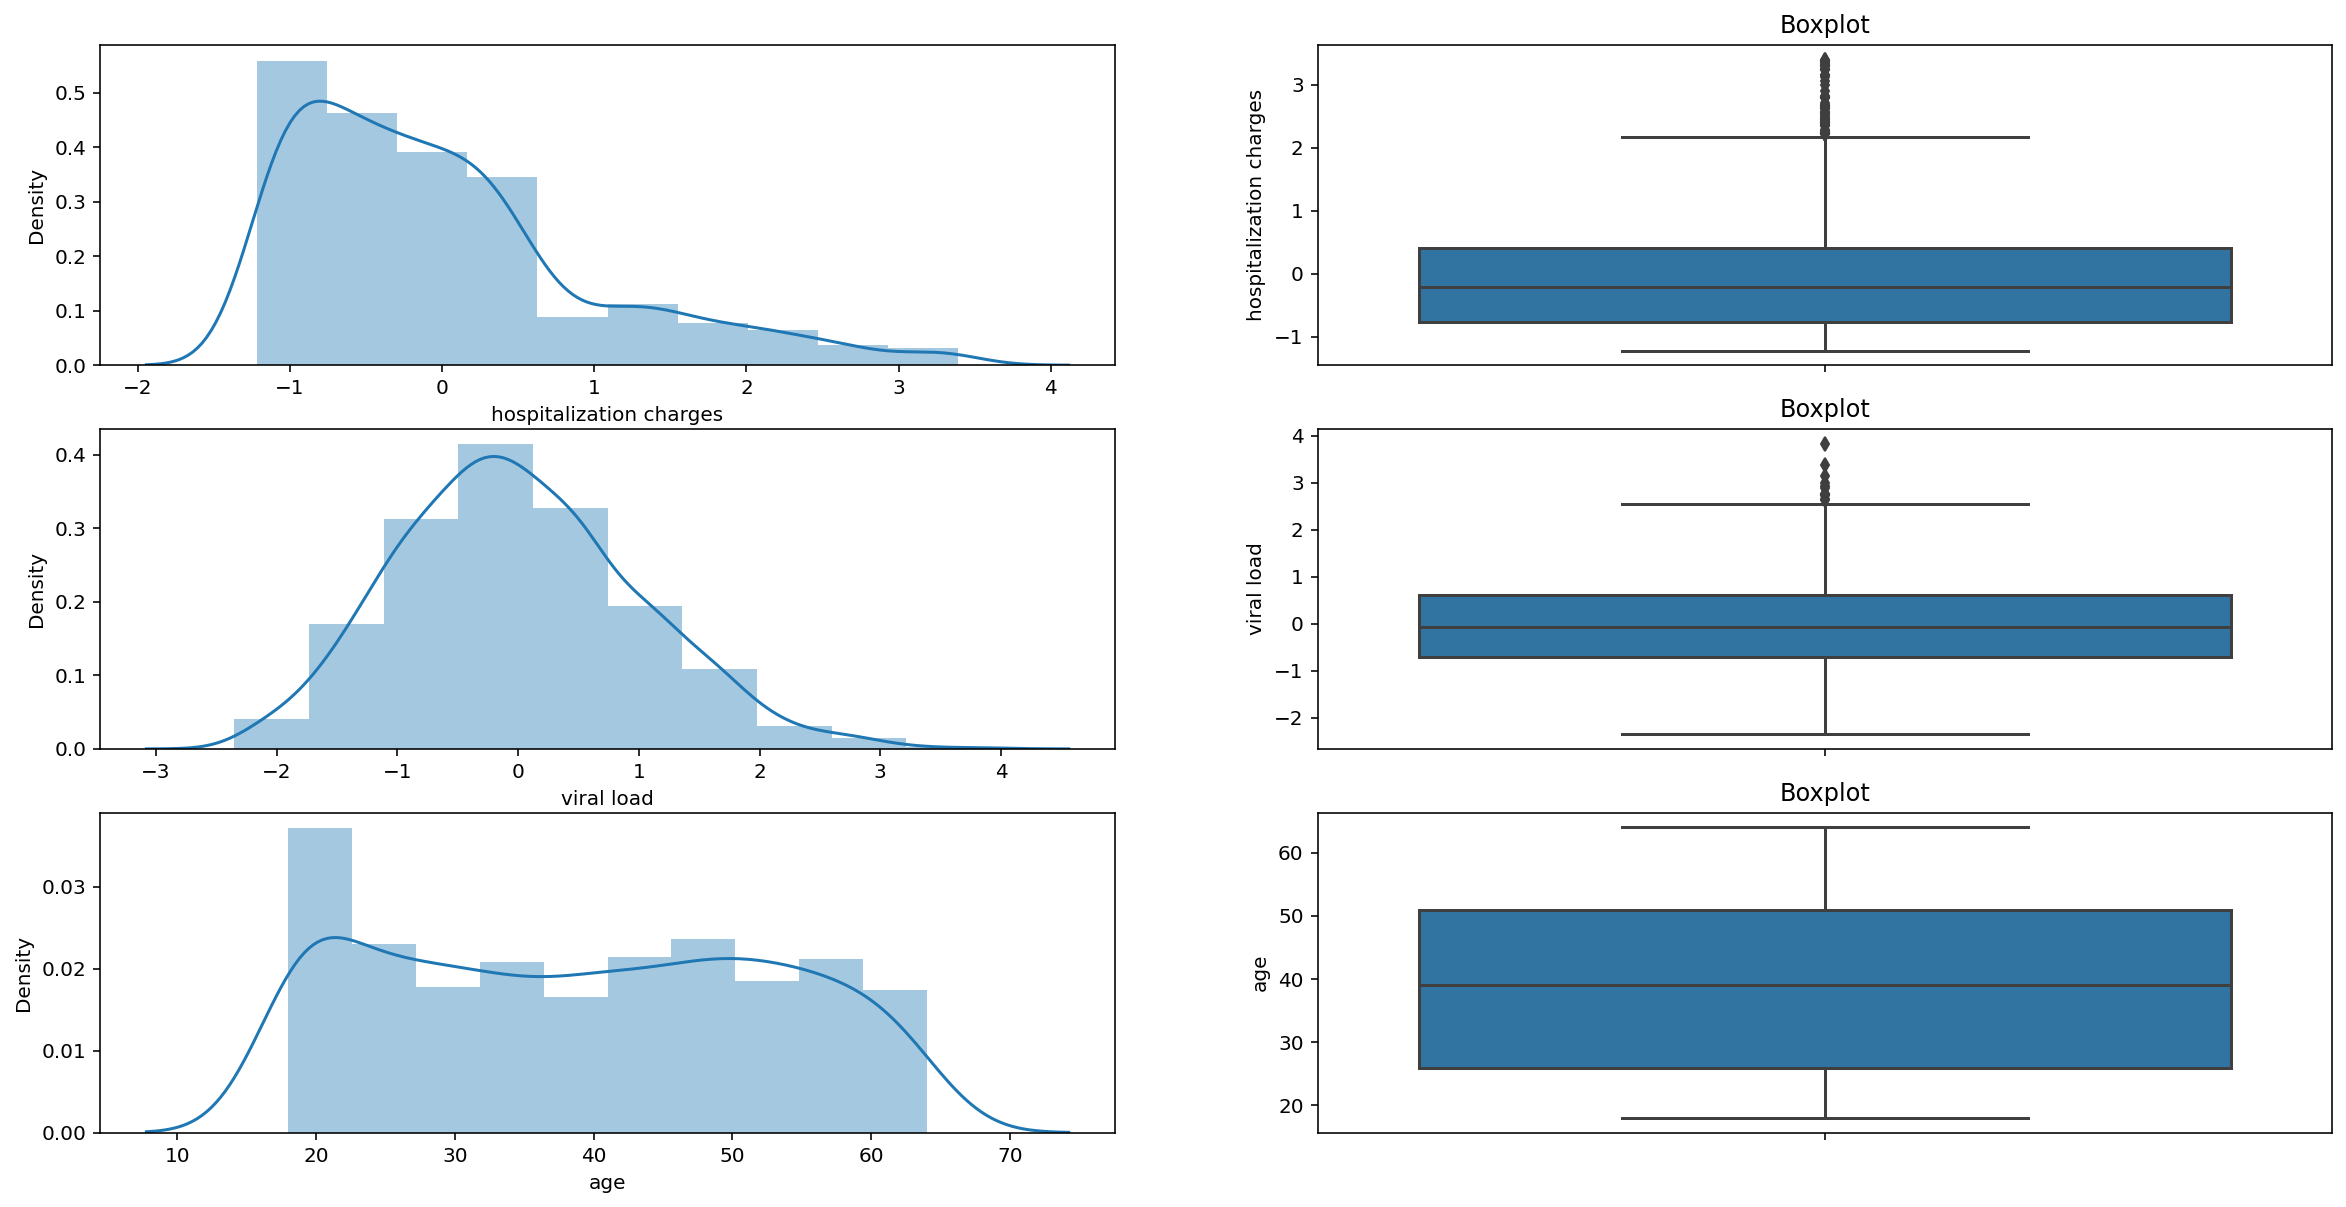

In [195]:
# Checking distribution of 'total_trip_hours' column -
plt.figure(figsize=(20, 10))
    
#Histogram
plt.subplot(3, 2, 1)
sbn.distplot(df['hospitalization charges'], bins=10)
#Boxplot
plt.subplot(3, 2, 2)
sbn.boxplot(y=df['hospitalization charges'])
plt.title('Boxplot')


#Histogram
plt.subplot(3, 2, 3)
sbn.distplot(df['viral load'], bins=10)
#Boxplot
plt.subplot(3, 2, 4)
sbn.boxplot(y=df['viral load'])
plt.title('Boxplot')

#Histogram
plt.subplot(3, 2, 5)
sbn.distplot(df['age'], bins=10)
#Boxplot
plt.subplot(3, 2, 6)
sbn.boxplot(y=df['age'])
plt.title('Boxplot')


plt.show()

## Outlier Treatment

In [198]:
# Outlier Treatment using IQR -

q1 = df['hospitalization charges'].quantile(0.25)
q3 = df['hospitalization charges'].quantile(0.75)
iqr = q3-q1
df = df[(df['hospitalization charges']>(q1-1.5*iqr) ) & (df['hospitalization charges']<(q3+1.5*iqr))]
#or
#dfn.loc[dfn['count']<(q1-1.5*iqr), 'count']= q1-1.5*iqr
#dfn.loc[dfn['count']>(q3+1.5*iqr), 'count']= q3+1.5*iqr
print("No. of rows : ", df.shape[0])

No. of rows :  1144


We have removed some of the outlier present in the date as per the hospitalization charges

## Count plot for hospitalization', 'vira load','severity level'

<Figure size 1080x360 with 0 Axes>

Text(0.5, 1.0, 'sex')

<Figure size 1080x360 with 0 Axes>

Text(0.5, 1.0, 'smoker')

<Figure size 1080x360 with 0 Axes>

Text(0.5, 1.0, 'region')

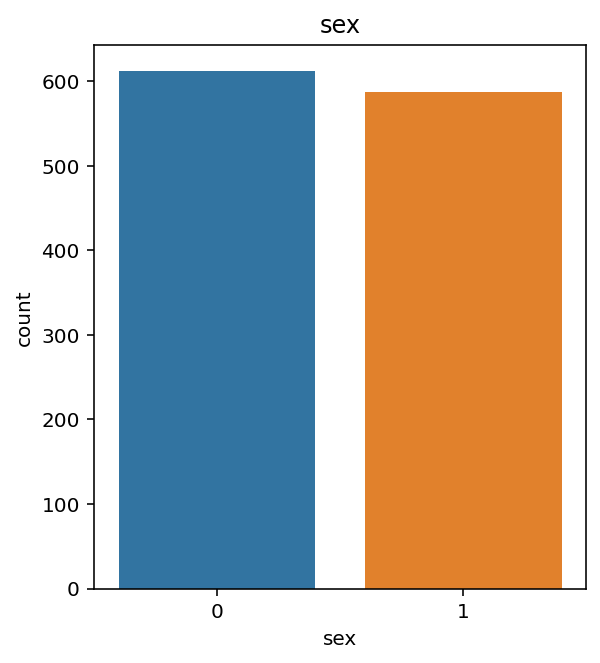

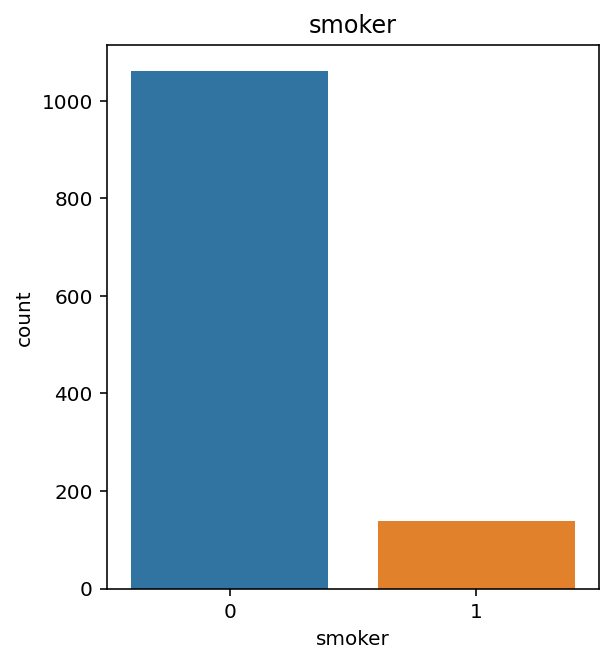

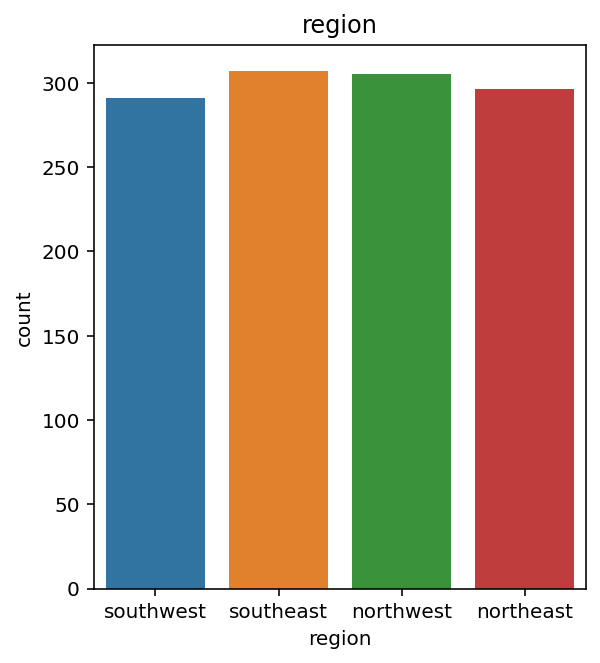

In [188]:

for i in range(len(cat_cols)):
  # Checking distribution of 'hospitalization', 'vira load','severity level' column -
  plt.figure(figsize=(15, 5))
      
  #Histogram
  plt.subplot(1, 3, i+1)
  sns.countplot(data=df, x=cat_cols[i])
  plt.title(cat_cols[i])
plt.show()



There are more non smoker datas than smoker ones, and the southease and northwest region datas are more

## Scaling - StandardScaler , MinMaxScaler

StandardScaler follows Standard Normal Distribution (SND). Therefore, it makes mean = 0 and scales the data to unit variance. 

MinMaxScaler scales all the data features in the range [0, 1] or else in the range [-1, 1] if there are negative values in the dataset. This scaling compresses all the inliers in the narrow range [0, 0.005]. 

In [193]:

scaler = StandardScaler()
scaler.fit(df[num_cols])

df[num_cols] = scaler.transform(df[num_cols])
df[num_cols]
df[num_cols].describe()

StandardScaler()

,viral load,severity level,hospitalization charges
0,-0.365401,-0.893260,0.961165
1,0.613260,-0.069399,-1.133186
2,0.483438,1.578322,-0.756846
3,-1.229219,-0.893260,1.665711
4,-0.200626,-0.893260,-0.837364
...,...,...,...
1333,0.143902,1.578322,0.092931
1334,0.303684,-0.893260,-1.066815
1335,1.122563,-0.893260,-1.146394
1336,-0.714922,-0.893260,-1.094170


,viral load,severity level,hospitalization charges
count,1.199000e+03,1.199000e+03,1.199000e+03
mean,-7.289137e-16,7.037277e-17,8.444732e-17
std,1.000417e+00,1.000417e+00,1.000417e+00
min,-2.352681e+00,-8.932601e-01,-1.216578e+00
25%,-7.149225e-01,-8.932601e-01,-7.624827e-01
50%,-6.081753e-02,-6.939944e-02,-2.096885e-01
75%,6.182532e-01,7.544612e-01,4.180422e-01
max,3.833853e+00,3.226043e+00,3.391073e+00


## Univariate Analysis

sex


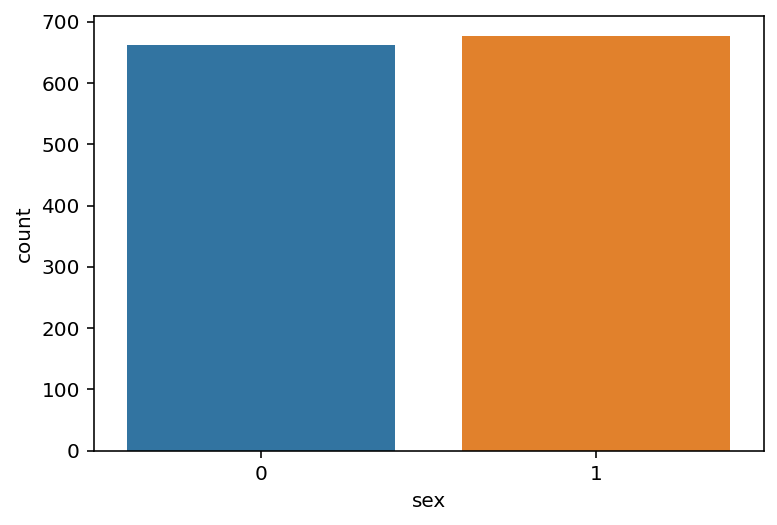

----------------------------------------------------------------------------------------------------
smoker


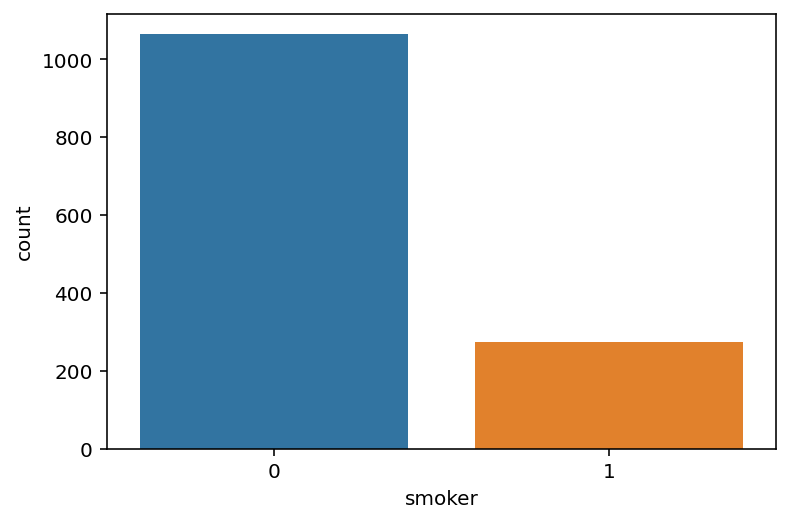

----------------------------------------------------------------------------------------------------
region


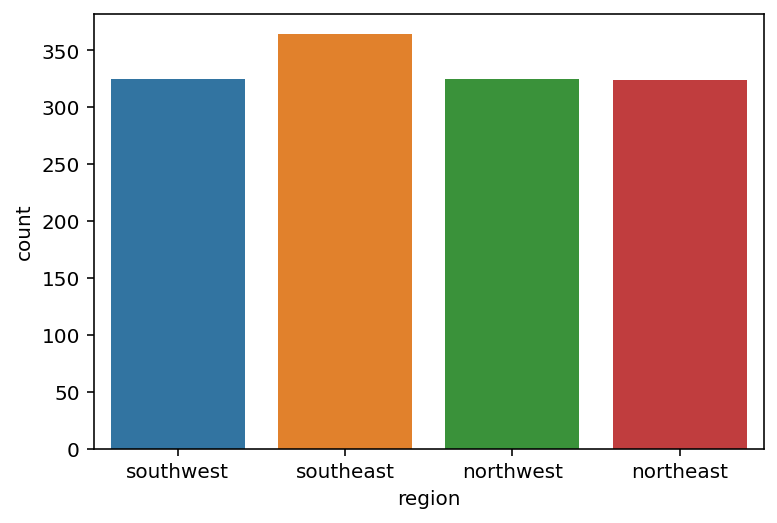

----------------------------------------------------------------------------------------------------


In [148]:
for i in range(len(cat_cols)):
  print(cat_cols[i])
  sns.countplot(data=df, x=cat_cols[i])
  plt.show()
  print("----"*25)

## Bi-Variate Analysis

## hospitalization charges with region, smoker, viral load etc

In [150]:
# Creating bins for hospitalization charges
bins=[1000,5000,10000,50000,100000,200000]
group=["very low","low","mid-range","High","Very high"]
df['charges_bin']=pd.cut(df['hospitalization charges'],bins=bins,labels=group)

# Creating bins for viral load
bins=[1,5,10,15,20]
group=["very low","low","high","very high"]
df['viral_bin']=pd.cut(df['viral load'],bins=bins,labels=group)


# Creating bins for age wise 
bins=[14,18,24,35,60,100]
group=["Kids","Teens","Adults","old adults","Senior citizen"]
df['Age_bin']=pd.cut(df['age'],bins=bins,labels=group)


In [151]:
## Age wise hospitalization charges

md=df[df['Age_bin']=='Kids']['hospitalization charges'].sum()
td=df[df['Age_bin']=='Teens']['hospitalization charges'].sum()
sd=df[df['Age_bin']=='Adults']['hospitalization charges'].sum()
fd=df[df['Age_bin']=='old adults']['hospitalization charges'].sum()
kd=df[df['Age_bin']=='Senior citizen']['hospitalization charges'].sum()

data_dict1 = {'Count':[md,td,sd,fd,kd], 'agegrp': ["Kids","Teens","Adults","old adults","Senior citizen"]}
df_b = pd.DataFrame(data=data_dict1, columns=['Count','agegrp'])
px.bar(data_frame=df_b, x="agegrp", y="Count", color="agegrp", barmode="group",title="Total hospitalization charges for Agewise")

As We can clearly see ,that the hospitalization charges are less for kids and more for adults , ie) 35-60 age category

### Finding mean of genderwise-male,female vs viral load

sex
0    10.126073
1    10.314423
Name: viral load, dtype: float64

Text(0, 0.5, 'Mean of viral load genderwise')

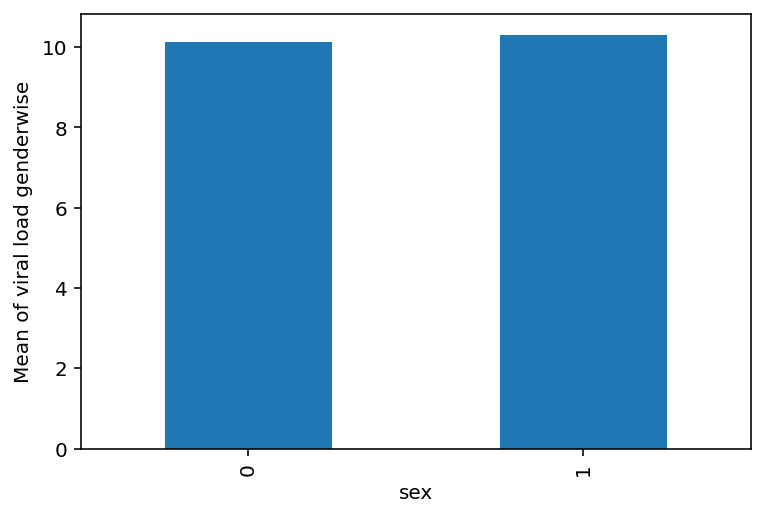

In [153]:
df.groupby("sex")["viral load"].mean()
print()
print()
df.groupby("sex").mean()["viral load"].plot.bar()
plt.ylabel("Mean of viral load genderwise")
plt.show()

### Mean - sex vs hospitalization charges

sex
0    31423.945619
1    34891.884615
Name: hospitalization charges, dtype: float64

Text(0, 0.5, 'Mean of hospitalization charges genderwise')

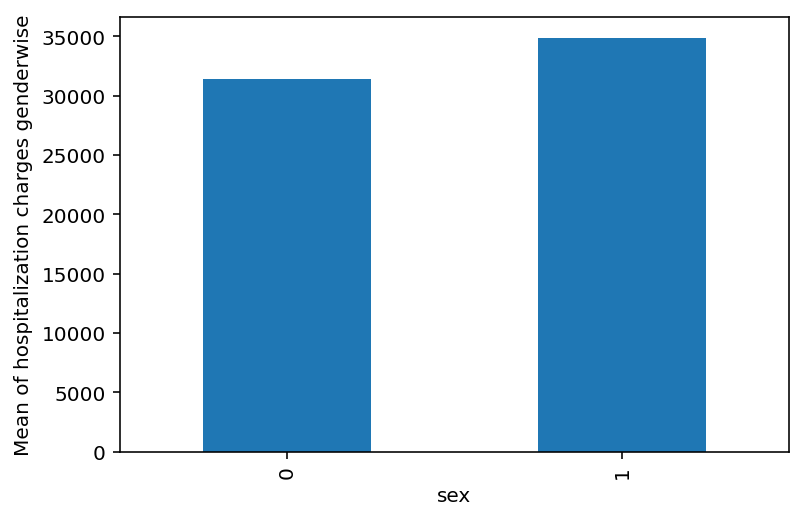

In [154]:
df.groupby("sex")["hospitalization charges"].mean()
print()
print()
df.groupby("sex").mean()["hospitalization charges"].plot.bar()
plt.ylabel("Mean of hospitalization charges genderwise")
plt.show()

WE can infer that the mean of male hospitalization charges is more than females

### CROSSTABS

charges_bin,very low,low,mid-range,High,Very high,All
smoker,,,,,,
0,92,177,734,61,0,1064
1,0,0,62,133,79,274
All,92,177,796,194,79,1338


Text(0.5, 0, 'smoker')

Text(0, 0.5, 'charges_bin')

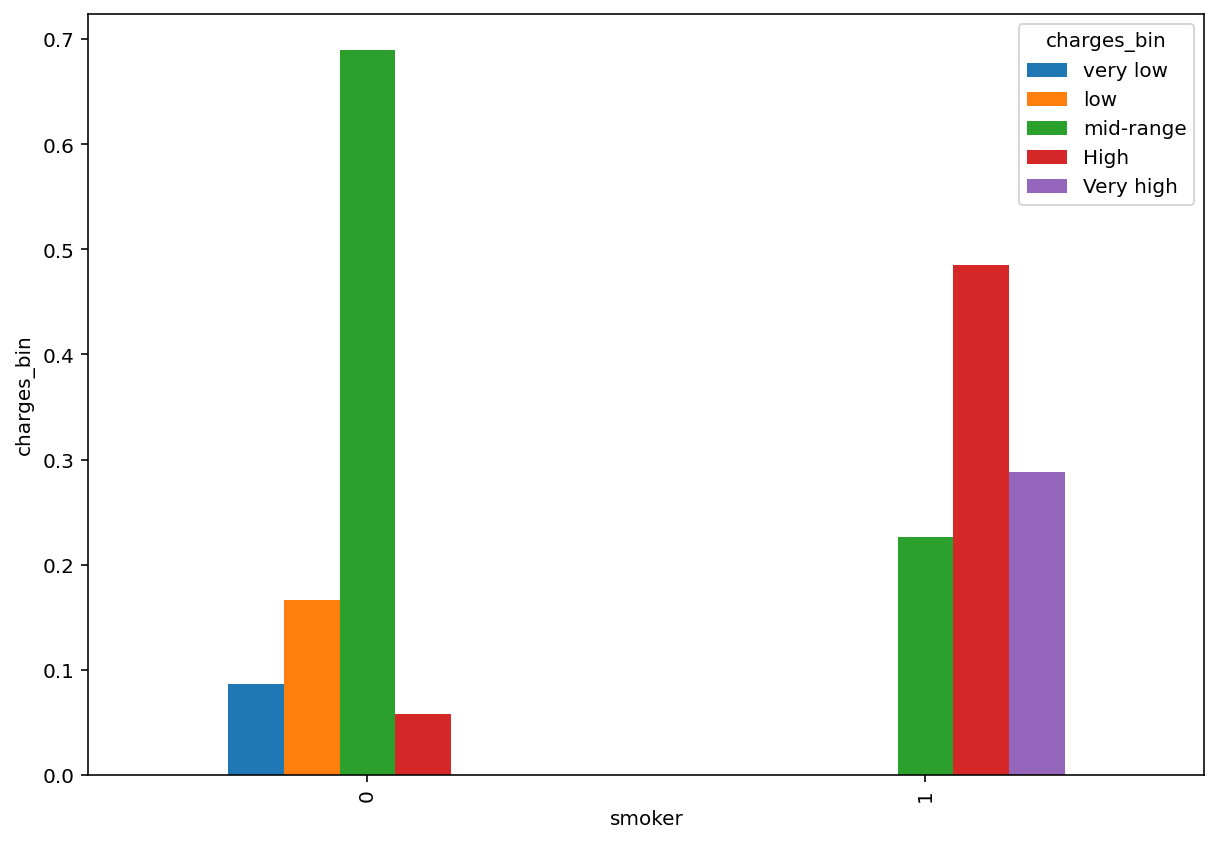

In [155]:
#Cross tab - Hospitalization charges vs smoker
pd.crosstab(df['smoker'],columns=df['charges_bin'], margins=True)
print()
print()
totalcount=pd.crosstab(df['smoker'],columns=df['charges_bin'], normalize='index')
totalcount.plot(kind='bar',figsize=(10,7))
plt.xlabel("smoker")
plt.ylabel("charges_bin")
plt.show()

The Non smoker has spend mid range charges for their hospitalizations . And this is less than more than the smoker

charges_bin,very low,low,mid-range,High,Very high,All
severity level,,,,,,
0,82,108,276,82,26,574
1,10,43,207,46,18,324
2,0,20,159,40,21,240
3,0,6,115,23,13,157
4,0,0,21,3,1,25
5,0,0,18,0,0,18
All,92,177,796,194,79,1338


Text(0.5, 0, 'severity level')

Text(0, 0.5, 'charges_bin')

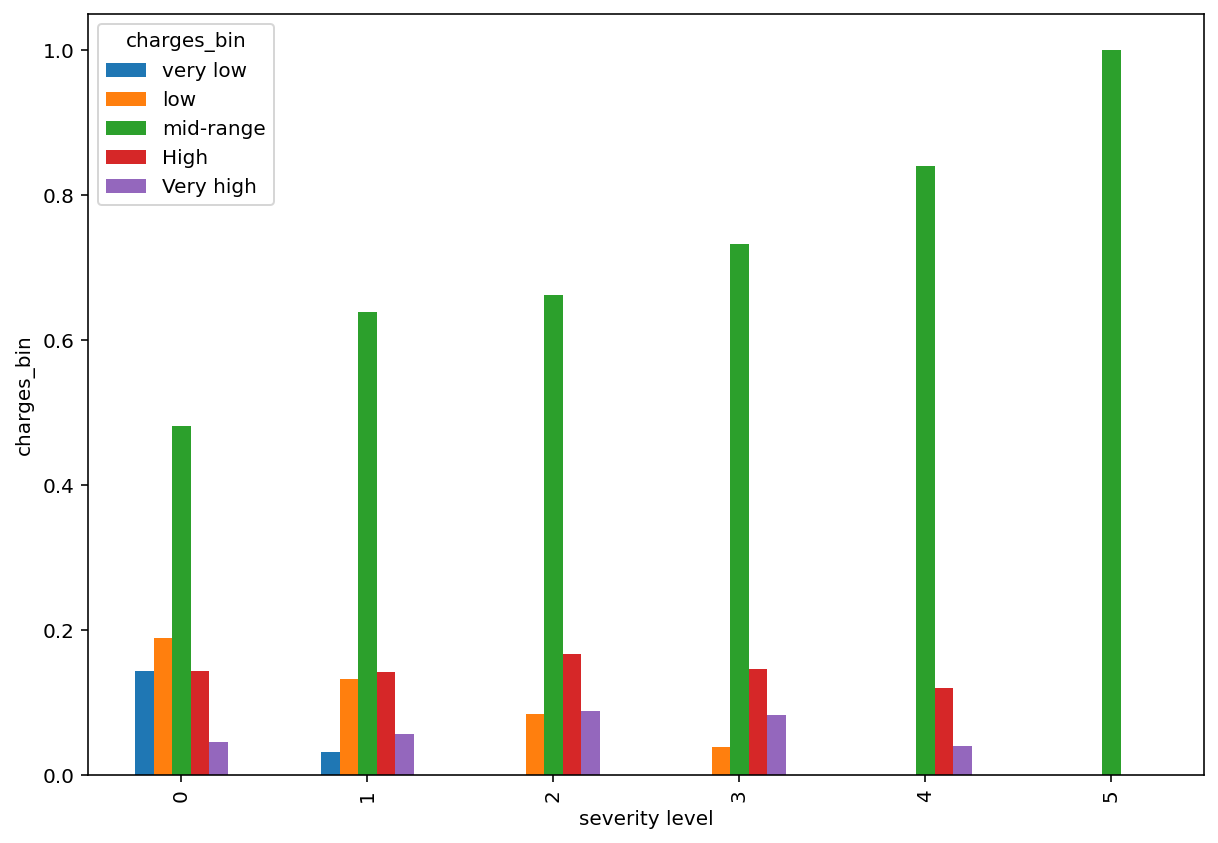

In [156]:
#Cross tab - Hospitalization charges vs Severity_level
pd.crosstab(df['severity level'],columns=df['charges_bin'], margins=True)
print()
print()
totalcount=pd.crosstab(df['severity level'],columns=df['charges_bin'], normalize='index')
totalcount.plot(kind='bar',figsize=(10,7))
plt.xlabel("severity level")
plt.ylabel("charges_bin")
plt.show()

We can see clearly that severity level 5 has mid range hospitalization charges , and severity level 2 has less hospitalization charges

### Region vs hospitalization charges- Mean

In [157]:
df_src= df.groupby(["region"]).agg({"hospitalization charges":[np.mean, "count"]})
df_src

hospitalization charges      
                             mean count
region                                 
northeast            33515.966049   324
northwest            31043.941538   325
southeast            36838.541209   364
southwest            30867.332308   325

### Region vs severity level - Mean

In [158]:
df_src= df.groupby(["region"]).agg({"severity level":[np.mean, "count"]})
df_src

severity level      
                    mean count
region                        
northeast       1.046296   324
northwest       1.147692   325
southeast       1.049451   364
southwest       1.141538   325

### Smoker vs hospitalization charges

smoker
0    21085.675752
1    80125.572993
Name: hospitalization charges, dtype: float64

Text(0, 0.5, 'Mean of hospitalization charges smokerwise')

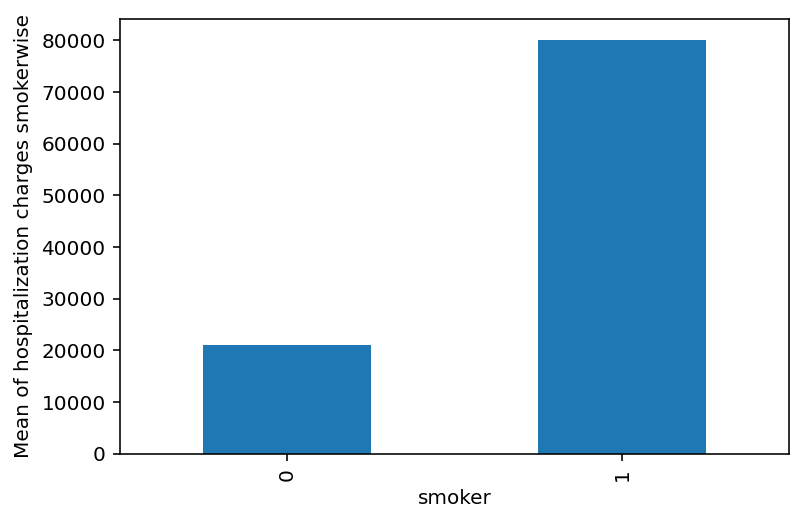

In [159]:
df.groupby("smoker")["hospitalization charges"].mean()
print()
print()
df.groupby("smoker").mean()["hospitalization charges"].plot.bar()
plt.ylabel("Mean of hospitalization charges smokerwise")
plt.show()

## Smoker vs viral load

smoker
0    10.217378
1    10.236204
Name: viral load, dtype: float64

Text(0, 0.5, 'Mean of viral load smokerwise')

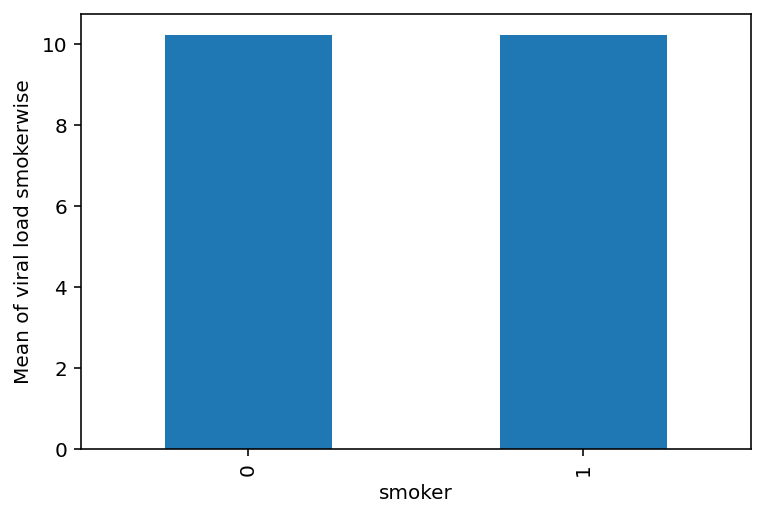

In [160]:
df.groupby("smoker")["viral load"].mean()
print()
print()
df.groupby("smoker").mean()["viral load"].plot.bar()
plt.ylabel("Mean of viral load smokerwise")
plt.show()

## Confidence Interval - 95% 

In [183]:
sample_size = 100
collect_sample_means_smoker = []
collect_sample_means_nonsmoker=[]
#collect_sample_means_clearweather=[]
#collect_sample_means_rainweather=[]  #Light rain,thunderstorm

for person in range(1000):
    sample_mean_smoker = df[df['smoker']==0]["hospitalization charges"].sample(sample_size).mean()
    collect_sample_means_smoker.append(sample_mean_smoker)
    
    sample_mean_nonsmoker = df[df['smoker']==1]["hospitalization charges"].sample(sample_size).mean()
    collect_sample_means_nonsmoker.append(sample_mean_nonsmoker)

# Collecting a random sample mean 
m_smoker = sample_mean_smoker
m_nonsmoker = sample_mean_nonsmoker


In [185]:
#95% confidence - z values 
Zl= norm.ppf(0.025)
Zr= norm.ppf(0.975)

#workingday vs nonworking day
smoker_mean=round(df[df['smoker']==0]['hospitalization charges'].mean(),2)
nonsmoker_mean=round(df[df['smoker']==1]['hospitalization charges'].mean(),2)

left = m_smoker + Zl * smoker_mean / np.sqrt(sample_size)
right = m_smoker + Zr * smoker_mean / np.sqrt(sample_size)
print(f"\n95% confidence that the population mean price of hospitalization charges for smoker is in [{np.round(left,2)}, {np.round(right,2)}]")

left = m_nonsmoker + Zl * nonsmoker_mean / np.sqrt(sample_size)
right = m_nonsmoker + Zr * nonsmoker_mean / np.sqrt(sample_size)
print(f"\n95% confidence that the population mean price of hospitalization charges for non smoker is in [{np.round(left,2)}, {np.round(right,2)}]")




95% confidence that the population mean price of hospitalization charges for smoker is in [16797.17, 24985.61]

95% confidence that the population mean price of hospitalization charges for non smoker is in [45149.55, 66723.11]


## Hypothesis Testing 

## Graph Distribution for smoker and non smoker

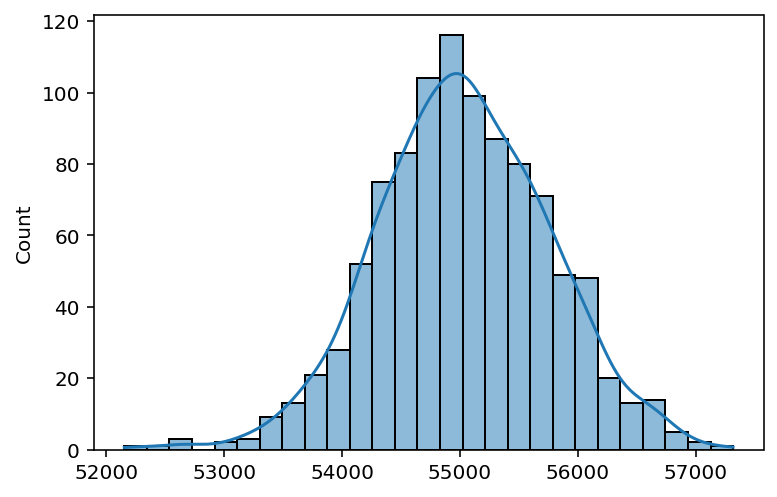

In [162]:
#Smoking 
sample_size = 100
collect_sample_means_smoker = []
for person in range(1000):
    sample_mean = df[df['smoker']==1]["hospitalization charges"].sample(sample_size).mean()
    collect_sample_means_smoker.append(sample_mean)
sns.histplot(collect_sample_means_smoker, kde=True)
m_smoker=collect_sample_means_smoker[0]

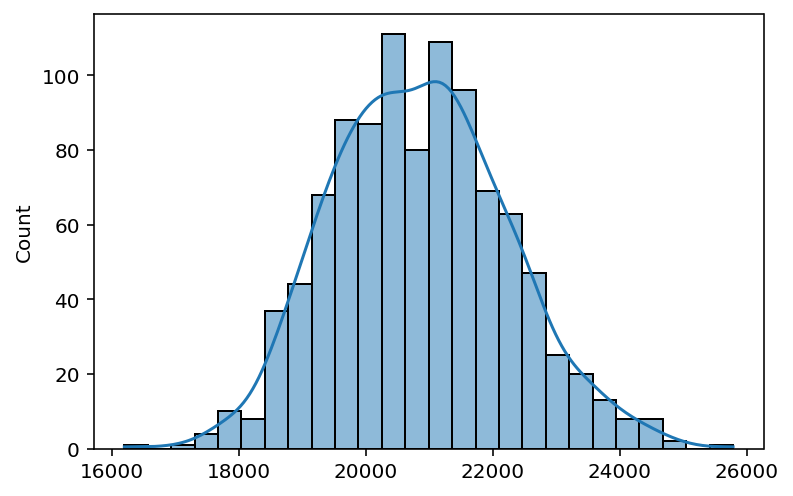

In [163]:
#Non Smoking 
sample_size = 100
collect_sample_means_nonsmoker = []
for person in range(1000):
    sample_mean = df[df['smoker']==0]["hospitalization charges"].sample(sample_size).mean()
    collect_sample_means_nonsmoker.append(sample_mean)
sns.histplot(collect_sample_means_nonsmoker, kde=True)
m_nonsmoker=collect_sample_means_nonsmoker[0]

### Chi Square test



* Null Hypothesis (H0): Charges bin is independent of the sex, region, severity level, smoker, age_bin

* Alternate Hypothesis (H1): Weather is not independent of the sex, region, severity level, smoker, age_bin

* Statastic Significance level (alpha): 0.05

In [199]:
 # H0: The two features not dependent (independent)
# Ha : Two features are dependent

#p-value > alpha - accept-h0 - independent
#p-value < alpha -reject h0- dependent


#chi2_contingency returns - chi stat, p value, df, expected freq
alpha = 0.05
columns=['sex','region','severity level','smoker','Age_bin']
for cols in columns:
   s= pd.crosstab(df[cols], df["charges_bin"])
   print(cols,"vs hospitalization charges")
   print("*"*10)
   print(s)
   print()
   print("--"*25)
   p_val = chi2_contingency(s)[1]
   print(cols,":::::  P-Val::::",p_val)
   print("--"*25)
   if p_val <= alpha:
     print("Since p-value is less than alpha . we reject❌ null hypothesis. ie)", cols,"and hospitalization charges- these two features are dependent✅")
     print()
   else:
     print("P-value is high , we fail to reject hypothesis✅ . ie)",cols,"and hospitalization charges- these two features are not dependent❌")


sex vs hospitalization charges
**********
charges_bin  very low  low  mid-range  High
sex                                        
0                  22  107        418    37
1                  70   70        378    42

--------------------------------------------------
sex :::::  P-Val:::: 1.4682938775083655e-07
--------------------------------------------------
Since p-value is less than alpha . we reject❌ null hypothesis. ie) sex and hospitalization charges- these two features are dependent✅

region vs hospitalization charges
**********
charges_bin  very low  low  mid-range  High
region                                     
northeast          10   46        200    27
northwest          14   49        201    21
southeast          38   43        195    15
southwest          30   39        200    16

--------------------------------------------------
region :::::  P-Val:::: 0.0007731558592721126
--------------------------------------------------
Since p-value is less than alpha . we reje

### Smoker vs Region

In [197]:
 # H0: The two features not dependent (independent)
# Ha : Two features are dependent

#p-value > alpha - accept-h0 - independent
#p-value < alpha -reject h0- dependent


#chi2_contingency returns - chi stat, p value, df, expected freq
alpha = 0.05
s= pd.crosstab(df['smoker'], df["region"])
print("smoker vs region")
print("*"*10)
print(s)
print()
print("--"*25)
p_val = chi2_contingency(s)[1]
print(cols,":::::  P-Val::::",p_val)
print("--"*25)
if p_val <= alpha:
  print("Since p-value is less than alpha . we reject❌ null hypothesis. ie) smoker and region- these two features are dependent✅")
  print()
else:
  print("P-value is high , we fail to reject hypothesis✅ . ie) smoker and region- these two features are not dependent❌")


smoker vs region
**********
region  northeast  northwest  southeast  southwest
smoker                                            
0             257        267        272        265
1              39         38         35         26

--------------------------------------------------
Age_bin :::::  P-Val:::: 0.3955637450555718
--------------------------------------------------
P-value is high , we fail to reject hypothesis✅ . ie) smoker and region- these two features are not dependent❌


# Hypothesis testing 2  - 2-sample T test


This is a method used to test whether the unknown population means of two groups are equal or not.

A two-sample t-test is used to analyze the results from A/B tests. Randomly sampled from two normal populations and the two independent groups have equal variances.



- Two-tailed test: The alternative hypothesis contains the “≠” sign.
- Left-tailed test: The alternative hypothesis contains the “<” sign.
- Right-tailed test: The alternative hypothesis contains the “>” sign.

T Test (Right Tailed)

- H0: hospitalization of male people is less
- HA: Hospitalization of female is greater

In [200]:
from scipy import stats


df_male=df[df['sex']==1]['hospitalization charges']
df_female=df[df['sex']==1]['hospitalization charges']


t_value,p_value=stats.ttest_ind(df_male,df_female)

print('Test statistic is %f'%float("{:.6f}".format(t_value)))

print('p-value for two tailed test is %f'%p_value)

alpha = 0.05

if p_value<=alpha:

    print('Conclusion','n','Since p-value(=%f)'%p_value,'<','alpha(=%.2f)'%alpha,'''We reject the null hypothesis H0. So we conclude that the 

effect of male and female on hospitalization charges are not equal i.e., μ1 = μ2 at %.2f level of significance.'''%alpha)

else:

    print('Conclusion','n','Since p-value(=%f)'%p_value,'>','alpha(=%.2f)'%alpha,'We do not reject the null hypothesis H0.')


Test statistic is 0.000000
p-value for two tailed test is 1.000000
Conclusion n Since p-value(=1.000000) > alpha(=0.05) We do not reject the null hypothesis H0.


We can infer , from the above , that the p value is greater than alpha value , it tells that the Distribution is Right tailed

### T-test Two tailed

- H0: Viral load of male people is less
- HA: Viral load of female is greater

In [ ]:
# Male vs Female- Viral load
df_male = df[df['sex']==1]['viral load'].values
df_female = df[df['sex']==0]['viral load'].values

#finding ratio

variance = (np.var(df_male)/np.var(df_female))
print("variance::",variance)

# 2- sample t test
stats.ttest_ind(a=df_male, b=df_female, equal_var=True)

We see , tha variances of two data is almost equal , and less, we proceeded with 2-sample t test , and as a result , we get p-value greater than 0.05(alpha value)

 Since pvalue is greater than 0.05 .We reject the null hypothesis.  this implies gender has direct effect on the Viral load
 

- H0: Hospitalization of male people is less
- HA: Hospitalization of female is greater

In [186]:
# Male vs Female
df_male = df[df['sex']==1]['hospitalization charges'].values
df_female = df[df['sex']==0]['hospitalization charges'].values

#finding ratio

variance = (np.var(df_male)/np.var(df_female))
print("variance::",variance)

# 2- sample t test
stats.ttest_ind(a=df_male, b=df_female, equal_var=True)

variance:: 1.087792297773175


Ttest_indResult(statistic=-0.8429829556932978, pvalue=0.39940638690194574)

We see , tha variances of two data is almost equal , and less, we proceeded with 2-sample t test , and as a result , we get p-value greater than 0.05(alpha value)

 Since pvalue is greater than 0.05 .We reject the null hypothesis.  this implies sex has direct effect on the hospitalization charges
 

In [ ]:
# Smoker vs Non-smoker
df_smoker = df[df['smoker']==1]['hospitalization charges'].values
df_nonsmoker = df[df['smoker']==0]['hospitalization charges'].values

#finding ratio

variance = (np.var(df_smoker)/np.var(df_nonsmoker))
print("variance::",variance)

# 2- sample t test
stats.ttest_ind(a=df_smoker, b=df_nonsmoker, equal_var=True)

We see , tha variances of two data is almost equal , and less, we proceeded with 2-sample t test , and as a result , we get p-value greater than 0.05(alpha value)

 Since pvalue is greater than 0.05 .We reject the null hypothesis.  this implies smoking habit has direct effect on the hospitalization charges
 


# Hypothesis Testing -3 - Anova

In [180]:
w1 = df[(df['sex']==0) & (df['severity level']==0)]['viral load'].values
w2 = df[(df['sex']==0) & (df['severity level']==1)]['viral load'].values
w3 = df[(df['sex']==0) & (df['severity level']==2)]['viral load'].values

# Anova test
stats.f_oneway(w1, w2, w3)

F_onewayResult(statistic=0.07443469817375759, pvalue=0.9282779784079939)

As we see in above test result , p-value is greater than 0.05,

we accept the null hypothesis. This states that viral load is similar/statastical in female and different severity level

## QQPLOT:  Severity level for male vs female

Q-Q plots are used to find the type of distribution for a random variable whether it be a Gaussian Distribution, Uniform Distribution, Exponential Distribution or even Pareto Distribution, etc. 

In [ ]:
# actual_time aggregated value and OSRM time aggregated value

e1 = ECDF(df[df['sex']==1]["severity level"])
e2 = ECDF(df[df['sex']==0]["severity level"])

plt.plot(e1.x, e1.y)
plt.plot(e2.x, e2.y)



qqplot_2samples(df[df['sex']==1]["severity level"], df[df['sex']==0]["severity level"], line="r")
plt.show()

## Shapiro-Wilk’s test for Normality

- H0- Count follows Normal distribution
- Ha- Count does not follows normal distibution

In [167]:
df.groupby(['smoker'])['severity level'].describe()

,count,mean,std,min,25%,50%,75%,max
smoker,,,,,,,,
0,1061.0,1.086711,1.216251,0.0,0.0,1.0,2.0,5.0
1,138.0,1.065217,1.203441,0.0,0.0,1.0,2.0,5.0


In [179]:

w1 = df[df['smoker'] == 0]['severity level'].sample(100)
w2 = df[df['smoker'] == 1]['severity level'].sample(100)

w, p_value = shapiro(df['severity level'].sample(1000)) 
print('The p-value is : ', p_value)

The p-value is :  1.9408333025773424e-32


As the p-value 1.9408333025773424e-32 is less than the level of significance, then we reject null hypothesis

## Levene's test for  Equality of Variance

- Ho - All count variances are equal
- Ha - Atleast one variance is different from rest

In [181]:
stat, p_value = levene(w1, w2)
print('The p-value is : ', p_value)

The p-value is :  0.7627963346595557


As the p-value 0.7627963346595557 is greater than the level of significance, then we accept the null hypothesis

# Observations


- There Are 1338 rows present in the data
- More datas from southeast and severity level 0
- Label encoding can be made for smoker , sex 
- Hospitalisation  charges and severity level follows normal distribution
- There are around 150 data , which is identified as outlier
- More females present in data , and more non smoker present in data
- Old adults category (35-60) has more hospitalisation charges and less for kids 
- Non smoker has mid range hospitalization spends than smoker , which is quite surprising
- 95% confidence that the population mean price of hospitalization charges for smoker is in [16797.17, 24985.61]
- 95% confidence that the population mean price of hospitalization charges for non smoker is in [45149.55, 66723.11]
- sex, region , severity level  and hospitalization charges- are dependent
- smoker and region- these two features are not dependent
- We see , tha variances of hospitalization charges and sex is almost equal , and less, we proceeded with 2-sample t test , and as a result , we get p-value greater than 0.05(alpha value)


# Recommendations

- As we see , smoker has more hospitalization charges, more medicines or rehabilitation centres can be opened in Apollo hospital centre
- Also , as more female data present in data , so more female related medical equipments can be erected in hospitals 
- Since more patients come from southeast and northwest , we can open more Apollo clinic centres in those places
- And Old adults go frequently to hospital, and so the charges / spending by those category is huge , so more medical equipment , and new technologies which supports the specific category can be opened.
- And non smoker spends mid range on their treatments. So for those non smoker category , more diet based planning , courses , exercises can be introduced, so that there can live further with no health issues 
- Non smokers can be rewarded with more offers / rewards . Health checkup plans like home sample collection, monthly health checkups, on line doctor consultations etc
- Non smoker spends more hospitalization charges  , and thinks ,that he/she wants to be healthy . So Diet nutritionist related centres can be opened for them to consult 
- smoker and Age category(35-60) are the main singnificant categories determine the hospitalization. So from them , those category person can be identified and given more priority in treatments / appointments
